In [2]:
from __future__ import division,print_function

import os
import sys

import matplotlib as mpl             ### For plotting options
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

DARK_MATTER_PAPER_LOCATION=os.environ["DARK_MATTER_PAPER_LOCATION"]
DARK_MATTER_CODE_LOCATION = os.environ["DARK_MATTER_CODE_LOCATION"]
sys.path.insert(0, DARK_MATTER_CODE_LOCATION)


import distribution_functions as dist
import model_utils
import sterile_neutrinos as sn
import plot_utils
import strong_lensing_data_processing as sl
import thermal_relic as th
import transfer_functions



## Parsing the posterior from Gilman et al. 2020
https://arxiv.org/pdf/1908.06983.pdf

Upper 95% upper limit on m is 8.087381230205034
Lower 95% lower limit on m is 4.980730121686948
Upper 95% upper limit on m is 122287325.40259938
Lower 95% lower limit on m is 95659.99150000757


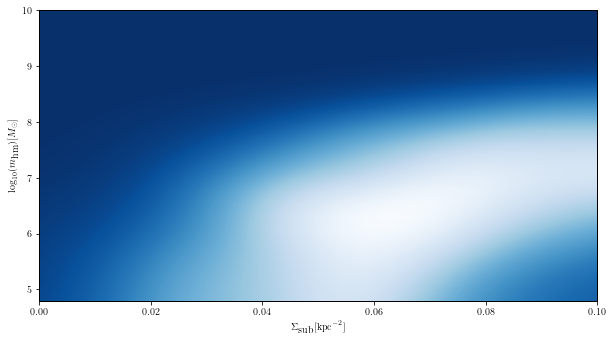

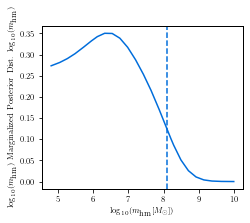

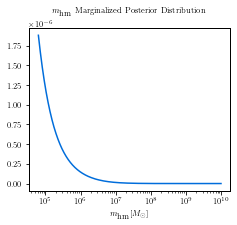

In [3]:
### Load the likelihood, which is provided as a 2D python function that has been pickled
f = sl.load_posterior(paper = "Gilman2020")
### Marginalize the likelihood to obtain the posterior distribution for log10(mhm)
log10_m_hm, p_log10_mhm = sl. marginalizing_over_sigma(f, samples=3000)
sl.plot_m_hm_posterior(log10_m_hm,p_log10_mhm)
### Transform the p(log10(mhm)) to p(mhm)
m_hm, p_m_hm = sl.mhm_log_to_linear(log10_m_hm,p_log10_mhm)


#### Test: Check that the 95 limit of p(log10mhm) and p(mhm) give the same number 

In [10]:

lower_95_log10mhm, upper_95_log10mhm, p = dist.norm_and_limit(log10_m_hm, p_log10_mhm )

Upper 95% upper limit on m is 8.087381230205034
Lower 95% lower limit on m is 4.980730121686948


In [11]:
lower_95_mhm, upper_95_mhm, p = dist.norm_and_limit(m_hm, p_m_hm  )

Upper 95% upper limit on m is 122287325.40259938
Lower 95% lower limit on m is 95659.99150000757


In [12]:
### taking the log of the upper 95% limit of m_hm
print(np.log10(upper_95_mhm))

8.087381446464235


In [13]:
## yep, they are the same.

#### Note: the value of the upper 95% limit for m_hm, 8.08, is slightly different from  the 7.8 in Gilman2020, because there they resample the likelihood and bin it in 20 bins. We chose to no resample and use the directly the kernel smoothed likelihood that was calculated from the multiplied likelihoods for each quasar

## Calculating Thermal Relic WDM

#### Make Fig. 3 (arXiv,2 PRL)from the paper 

Thermal relic WDM, for  Case I   include_baryons
Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Thermal relic WDM, for  Case II   no_baryons
Upper 95% upper limit on m is 37.185986098102035
Lower 95% lower limit on m is 4.337013141901084


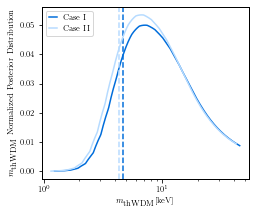

In [14]:
th.plot_thWDM(m_hm,p_m_hm)

## Sterile Neutrino PK and KTY cases

#### Make Fig 3 from the paper

0.7393098606801248
1.26736726386168
1.7403404597768237
3.3977978166071576
5.866431765794975
6.219681363429269
10.890111189573346
19.09927449590057
2.59665312326464
4.497619579094924
6.231811767195195
12.31937112387924
21.664147148907645


(array([ 1.,  2.,  3.,  7., 14.]),
 array([ 2.59665312,  4.49761958,  6.23181177, 12.31937112, 21.66414715]))

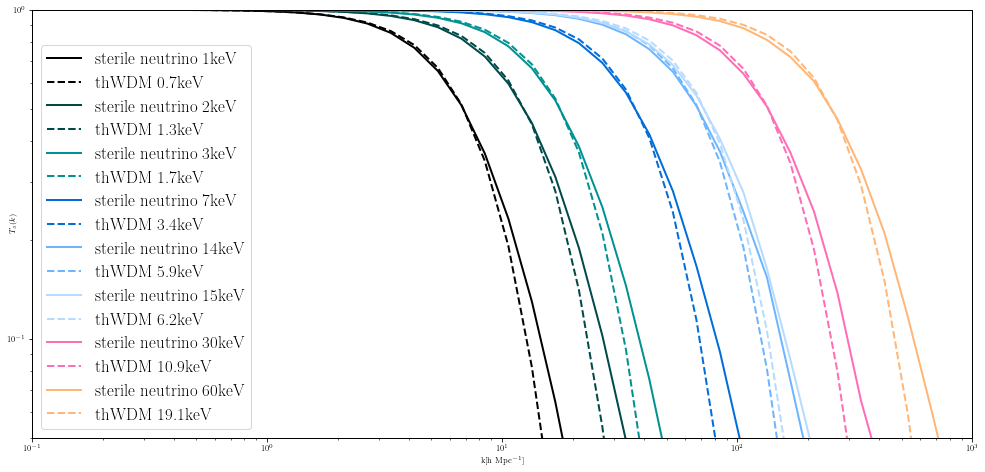

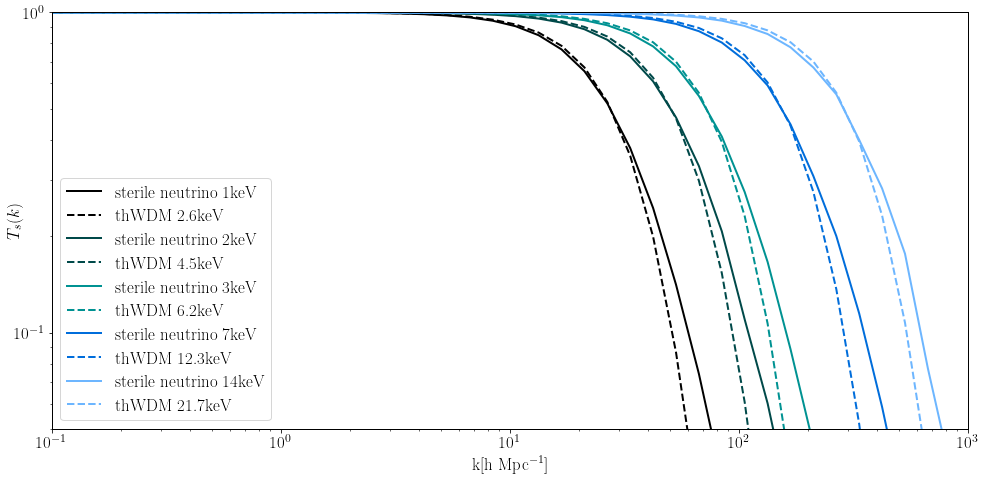

In [15]:
#### Kev 2022 February Transfer functions
t1 = transfer_functions.TransferFunctions(cosmo_constants_type="Planck2018", transfer_function_type = "PK",th_WDM_model_type="viel",sn_thWDM_relation="half_mode")
t1.fit_sn_with_WDM(paper_plot=False,plot_large=True)
poly_dict_thWDM_to_sn, poly_dict_sn_to_thWDM =t1.fit_polynomials()

#### KTY Transfer functions
t2 = transfer_functions.TransferFunctions(cosmo_constants_type="Planck2018", transfer_function_type = "KTY",th_WDM_model_type="viel",sn_thWDM_relation="half_mode")
t2.fit_sn_with_WDM(paper_plot=False,plot_large=True)


#### Make the the fits Table 1 from the paper


In [16]:
transfer_functions.make_table(t1,t2)

#### Make Figure 4 from the paper, the plot of m_sn vs m_thWDM

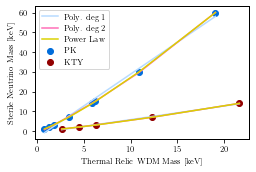

In [17]:
transfer_functions.plot_sn_vs_wdm_overlay(t1, t2, paper_plot=True)

In [18]:
#sn.plot_sn_posteriors(m_hm,p_m_hm,t1,t2)

### Dodelson Wilson

Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Upper 95% upper limit on m is 590.6908717941933
Lower 95% lower limit on m is 33.659591446083596
Upper 95% upper limit on m is 37.185986098102035
Lower 95% lower limit on m is 4.337013141901084
Upper 95% upper limit on m is 539.5565866901611
Lower 95% lower limit on m is 30.74578453340633


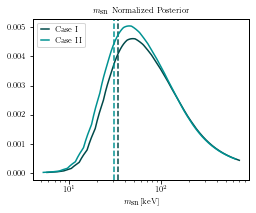

In [19]:
sn.calculate_DW(m_hm,p_m_hm)

Calculating  Case I   include_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Calculating the sn posterior
Calculate sn for degree  2
Upper 95% upper limit on m is 164.78075486823192
Lower 95% lower limit on m is 10.672305637477177
Calculating  Case II   no_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 37.185986098102035
Lower 95% lower limit on m is 4.337013141901084
Calculating the sn posterior
Calculate sn for degree  2
Upper 95% upper limit on m is 149.3603083852471
Lower 95% lower limit on m is 9.84056590406448
Calculating  Case I   include_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Calculating the sn posterior
Calculate sn for degree  2
Upper 95% upper limit on m is 31.242176451448273
Lower 95% lower limit on m is 2.1090716542434294
Calculating  Case II   no_baryons
Calculating 

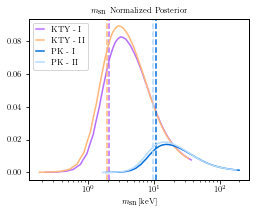

In [20]:
sn.plot_sn_posteriors(m_hm,p_m_hm,t1,t2)

### Make Figure 5 (arXiv, 4 prl) from the paper

Calculating  Case I   include_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Calculating the sn posterior
Calculate sn for degree  2
Upper 95% upper limit on m is 164.78075486823192
Lower 95% lower limit on m is 10.672305637477177
Calculating  Case II   no_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 37.185986098102035
Lower 95% lower limit on m is 4.337013141901084
Calculating the sn posterior
Calculate sn for degree  2
Upper 95% upper limit on m is 149.3603083852471
Lower 95% lower limit on m is 9.84056590406448
Calculating  Case I   include_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Calculating the sn posterior
Calculate sn for degree  2
Upper 95% upper limit on m is 31.242176451448273
Lower 95% lower limit on m is 2.1090716542434294
Calculating  Case II   no_baryons
Calculating 

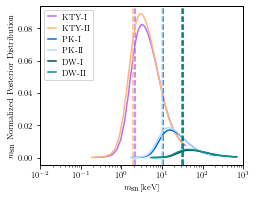

In [21]:
## To make the single panel figure, as submitted to prl
sn.plot_all_sn(m_hm,p_m_hm,t1,t2, paper_plot=True)

## To make the 4 panels figure, as it is on the arXiv
#sn.plot_all_sn_panels(m_hm,p_m_hm,t1,t2, paper_plot=True)

In [22]:
##from Vegetti et al 2018 https://ui.adsabs.harvard.edu/abs/2018MNRAS.481.3661V


In [23]:
DARK_MATTER_PAPER_LOCATION

'/home/izelko/Dropbox/Apps/Overleaf/Constraining sterile neutrino models using strong gravitational lensing'

Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Upper 95% upper limit on m is 37.185986098102035
Lower 95% lower limit on m is 4.337013141901084
Calculating  Case I   include_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Calculating the sn posterior
Calculate sn for degree  2
Upper 95% upper limit on m is 164.78075486823192
Lower 95% lower limit on m is 10.672305637477177
Calculating  Case II   no_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 37.185986098102035
Lower 95% lower limit on m is 4.337013141901084
Calculating the sn posterior
Calculate sn for degree  2
Upper 95% upper limit on m is 149.3603083852471
Lower 95% lower limit on m is 9.84056590406448
Calculating  Case I   include_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Calcula

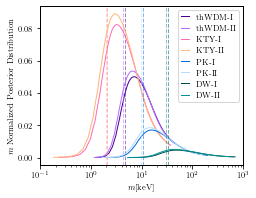

In [53]:

def plot_all_sn_and_WDM(m_hm,p_m_hm,t1,t2, paper_plot=False):

    """
    Makes the plots of the posteriors of the PL, KTY, and DW 
    """
     
    H_0, Omega_Baryon, Omega_Matter, Omega_Lambda, Omega_Neutrinos, T_cmb, h = model_utils.cosmo_param_Planck_2018()
    Omega_DM = Omega_Matter-Omega_Baryon-Omega_Neutrinos
    color_dict =plot_utils.colorblind_color_dict_15()

    
    case_list = ["include_baryons","no_baryons" ]
    label_list= ["DW-I","DW-II"]
    color_list = [color_dict["cb_dark_green"], color_dict["cb_blue_green"]]
    wdm_color_list = [color_dict["cb_purple"], color_dict["cb_magenta"]]
    wdm_label_list = ["thWDM-I","thWDM-II"]
    
    fontsize=8
    plot_utils.set_plot_options(fontsize=fontsize)
    fig, ax = plt.subplots(figsize=(3.6, 2.8))
    linewidth=1
    alpha=0.5
    ### plot the thWDM posterior
    for i in range(2):
        case = case_list[i]
        wdm_label=wdm_label_list[i]
        wdm_color = wdm_color_list[i]
        m_thWDM_lower_limit, m_thWDM_upper_limit, m_thWDM , p_thWDM = th.calculate_thWDM(m_hm,p_m_hm,case)
        ax.plot(m_thWDM,p_thWDM, label=wdm_label,color=wdm_color,linewidth=linewidth)
        ax.axvline(x=m_thWDM_lower_limit,linestyle='--', color=wdm_color, linewidth=linewidth,alpha=alpha)
    ### plot the PK and KTY
    poly_dict_thWDM_to_sn1, poly_dict_sn_to_thWDM1 =t1.fit_polynomials()
    poly_dict_thWDM_to_sn2, poly_dict_sn_to_thWDM1 =t2.fit_polynomials()

    set_labels = ["PK","KTY"]
    m_sn_list1, p_sn_list1, sn_lower_limit_list1 = sn.run_sn_all_cases(m_hm,p_m_hm,poly_dict_thWDM_to_sn1)
    m_sn_list2, p_sn_list2, sn_lower_limit_list2= sn.run_sn_all_cases(m_hm,p_m_hm,poly_dict_thWDM_to_sn2)
    

    ax.plot(m_sn_list2[0], p_sn_list2[0],color=color_dict["cb_bright_pink"],label="KTY-I",linewidth=linewidth)
    ax.axvline(x=sn_lower_limit_list2[0], color=color_dict["cb_bright_pink"],linestyle='--',linewidth=linewidth, alpha=alpha)
    ax.plot(m_sn_list2[1], p_sn_list2[1],color=color_dict["cb_light_pink"],label="KTY-II",linewidth=linewidth)
    ax.axvline(x=sn_lower_limit_list2[1], color=color_dict["cb_light_pink"],linestyle='--',linewidth=linewidth, alpha=alpha)
    ax.plot(m_sn_list1[0], p_sn_list1[0],color=color_dict["cb_blue"], label="PK-I",linewidth=linewidth)
    ax.axvline(x=sn_lower_limit_list1[0], color=color_dict["cb_blue"],linestyle='--',linewidth=linewidth,alpha=alpha)
    ax.plot(m_sn_list1[1], p_sn_list1[1],color=color_dict["cb_light_blue"],label="PK-II",linewidth=linewidth)
    ax.axvline(x=sn_lower_limit_list1[1], color=color_dict["cb_light_blue"],linestyle='--',linewidth=linewidth,alpha=alpha)

    ### plot the DW model
    for i in range(2):
        case = case_list[i]
        label=label_list[i]
        color = color_list[i]
        m_thWDM_lower_limit, m_thWDM_upper_limit, m_thWDM , p_thWDM = th.calculate_thWDM(m_hm,p_m_hm,case)
        lower_95_limit, upper_95_limit, m_sn, p_norm  = sn.p_thWDM_to_p_snDW(m_thWDM, p_thWDM, Omega_DM)
        ax.plot(m_sn, p_norm ,label=label, color=color, linewidth=linewidth)
        ax.axvline(x=lower_95_limit,linestyle='--', color=color,linewidth=linewidth,alpha=alpha)
  

    ax.set_xlabel(r"$m$[keV]")
    ax.set_ylabel(r"$m$ Normalized Posterior Distribution",fontsize=fontsize)
    ax.set_xscale("log")
    ax.set_xlim([1E-1,1E3])
    ax.legend(loc="upper right",handlelength =1,fontsize=fontsize)
    plt.tight_layout()
    if paper_plot == True:
        fig.savefig(DARK_MATTER_PAPER_LOCATION+"/m_sn_WDM.pdf",bbox_inches = 'tight',pad_inches = 0.01)
    return

plot_all_sn_and_WDM(m_hm,p_m_hm,t1,t2, paper_plot=True)

## Lyman-alpha limit

In [24]:
#These are limits based on the lyman-alpha paper: 

### 3.3 keV constraint from Viel et al. (2013), 5.3 keV constraint from Iršič et al. (2017)
m_thWDM_lalpha_viel = 3.3 #keV
m_thWDM_lalpha_irsic = 5.3 #keV


In [25]:
### Limits on PK and KTY
def lyman_alpha_PK_and_KTY(degree=2):
    poly_dict_thWDM_to_snPK, poly_dict_sn_to_thWDM1 =t1.fit_polynomials()
    poly_dict_thWDM_to_snKTY, poly_dict_sn_to_thWDM1 =t2.fit_polynomials()
    m_snPK_v = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snPK, np.array([m_thWDM_lalpha_viel]), degree)
    m_snPK_i = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snPK, np.array([m_thWDM_lalpha_irsic]), degree)
    print( "PK Ly alpha: Viel", m_snPK_v,"keV, Irsic", m_snPK_i, "keV")
    m_snKTY_v = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snKTY, np.array([m_thWDM_lalpha_viel]), degree)
    m_snKTY_i = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snKTY, np.array([m_thWDM_lalpha_irsic]), degree)
    print( "KTY Ly alpha: Viel", m_snKTY_v,"keV, Irsic", m_snKTY_i, "keV")
    
        
lyman_alpha_PK_and_KTY(degree=2)

PK Ly alpha: Viel [7.07522106] keV, Irsic [12.49834892] keV
KTY Ly alpha: Viel [1.3473325] keV, Irsic [2.49217244] keV


In [ ]:
### Limits on DW

def get_Omega_DM():
    H_0, Omega_Baryon, Omega_Matter, Omega_Lambda, Omega_Neutrinos, T_cmb, h = model_utils.cosmo_param_Planck_2018()
    Omega_DM = Omega_Matter-Omega_Baryon-Omega_Neutrinos
    return Omega_DM
def lyman_alpa_DW():
    Omega_DM = get_Omega_DM()
    msnDW_v = sn.m_thWDM_to_msnDW(m_thWDM_lalpha_viel, Omega_DM)
    msnDW_i = sn.m_thWDM_to_msnDW(m_thWDM_lalpha_irsic, Omega_DM)
    print("DW Ly alpha: Viel", msnDW_v,"keV, Irsic", msnDW_i, "keV")
    return msnDW_v, msnDW_i
lyman_alpa_DW()

In [ ]:
### Limits on nuMSM

def hm_from_thWDM():
    
    case_list = ["include_baryons","no_baryons" ]
    label_list= ["Case I","Case II"]
    m_sn_list = []
    p_sn_list = []
    sn_lower_limit_list = []
    
    for case_index in range(len(case_list)):
        case  = case_list[case_index]
        label=label_list[case_index]
        print("Calculating ",label," ", case)

        m_hmv = th.m_thWDM_to_m_hm(m_thWDM_lalpha_viel,case)
        m_hmi = th.m_thWDM_to_m_hm(m_thWDM_lalpha_irsic,case)
        print("Viel", np.log10(m_hmv))
        print("Irsic", np.log10(m_hmi))


In [ ]:
hm_from_thWDM()

## Constraints using Milky Way satellite analysis

In [ ]:
def galaxy_constraints(degree=2):
    m_hm_G = 10**7.0
    
    poly_dict_thWDM_to_snPK, poly_dict_sn_to_thWDM1 =t1.fit_polynomials()
    poly_dict_thWDM_to_snKTY, poly_dict_sn_to_thWDM1 =t2.fit_polynomials()
    
    Omega_DM = get_Omega_DM()

    case_list = ["include_baryons","no_baryons" ]
    label_list= ["Case I","Case II"]
    for i in range(2):
        case= case_list[i]
        m_thWDM = th.m_hm_to_m_thWDM(m_hm_G,case)
        print("Case ",case )
        print("thWDM", m_thWDM)
        m_snPK = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snPK, np.array([m_thWDM]), degree)
        print( "PK SnDW galaxy: ", m_snPK, " keV")
        m_snKTY = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snKTY, np.array([m_thWDM]), degree)
        print( "KTY SnDW galaxy:", m_snKTY," keV")
        m_snDW = sn.m_thWDM_to_msnDW(m_thWDM, Omega_DM)
        print( "DW SnDW galaxy:", m_snDW," keV")
   


In [ ]:
galaxy_constraints()

## Constraints using strong lensing,  Milky Way satellite, Lyman alpha analysis

In [ ]:
def joint_constraints(degree=2):
    m_hm_J = 2E7
    print(np.log10(m_hm_J))
    
    poly_dict_thWDM_to_snPK, poly_dict_sn_to_thWDM1 =t1.fit_polynomials()
    poly_dict_thWDM_to_snKTY, poly_dict_sn_to_thWDM1 =t2.fit_polynomials()
    
    Omega_DM = get_Omega_DM()
    case_list = ["include_baryons","no_baryons" ]
    label_list= ["Case I","Case II"]
    for i in range(2):
        case= case_list[i]
        m_thWDM = th.m_hm_to_m_thWDM(m_hm_J,case)
        print("Case ",case )
        print("thWDM", m_thWDM)
        m_snPK = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snPK, np.array([m_thWDM]), degree)
        print( "PK SnDW galaxy: ", m_snPK, " keV")
        m_snKTY = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snKTY, np.array([m_thWDM]), degree)
        print( "KTY SnDW galaxy:", m_snKTY," keV")
        m_snDW = sn.m_thWDM_to_msnDW(m_thWDM, Omega_DM)
        print( "DW SnDW galaxy:", m_snDW," keV")
joint_constraints()